# Андреева Влада, СКБ 171

# Вариант 1. Сортировки: выбором, быстрая, слиянием.

In [3]:
import pandas as pd

# Реализация сортировок

## Сортировка выбором 

In [4]:
def choice(mas):
    """ алгоритм сортировки выбором:
    возвращает список отсортированных по неубыванию объектов.
    mas -- последовательность объектов, которую необходимо отсортировать """
    
    """ для каждого объекта, начиная с первого, ищем наименьший среди нерассмотренных(всех, что справа) 
    и меняем их местами с текущим. Если текущий наименьший, то переходим к рассмотрению следующего """
    for i in range(len(mas)):           
        mmin = i                        
        for j in range(i+1, len(mas)): 
            if mas[j] < mas[mmin]:     
                mmin = j               
        if mmin != i:                  
            mas[mmin], mas[i] = mas[i], mas[mmin] 
    return mas                         

## Быстрая сортировка

In [5]:
def quick(mas):
    """ алгоритм быстрой сортировки (рекурсивный):
    возвращает список отсортированных по неубыванию объектов.
    mas -- последовательность объектов, которую необходимо отсортировать """
    
    """ делим mas на три части:
    left -- список объектов, которые меньше выбираемого среднего объекта 
    middle -- список объектов, равных среднему
    right -- список объектов, которые больше среднего объекта.
    Далее рекурсивно вызываем quick от left и right, пока они содержат более одного элемента. """
    if len(mas) > 1:                              
        med = mas[len(mas) // 2]             
        left, right, middle = [], [], []
        for i in range(len(mas)):           
            if mas[i] < med:           
                left.append(mas[i])
            elif mas[i] > med:          
                right.append(mas[i])
            else:
                middle.append(mas[i])           
        return quick(left) + middle + quick(right) 
    else:
        return mas

## Сортировка слиянием 

In [6]:
def sortmerge(m1, m2):
    """ возвращает список объектов последовательностей m1 и m2, отсортированных по неубыванию
    m1 -- последовательность объектов, отсортированных по неубыванию
    m2 -- последовательность объектов, отсортированных по неубыванию """
    result = [] # возвращаемая итоговая отсортированная последовательность
    while len(m1) > 0 and len(m2) > 0:
        """ выполняем, пока одна из последовательностей m1 или m2 не опустеет:
        в result поочередно записываем наименьший из минимальных элементов m1 и m2
        и удаляем его из соответствующей последовательности """
        if m1[0] < m2[0]:
            result.append(m1[0])
            m1.pop(0)
        else:
            result.append(m2[0])
            m2.pop(0)
    """ из предыдущего цикла вышли, потому что одна из последовательностей m1 или m2 опустела:
    находим ту, в которой еще есть отсортированные элементы, не записанные в result,
    и конкатенируем эти последовательности """
    if len(m1) > 0:
        result = result + m1
    elif len(m2) > 0:
        result = result + m2
    return result
            
def merge(mas):
    """ алгоритм сортировки слиянием (рекурсивный):
    возвращает список отсортированных по неубыванию объектов
    mas -- последовательность объектов, которую необходимо отсортировать """
    
    """ делим исходную последовательность на элементы по одному объекту,
    далее соседние между собой по-особенному(функцией sortmerge) конкатенируем.
    Полученные соседние группы так же между собой этой функцией конкатенируются.
    И т.д., пока не получится одна группа, которая и будет отсортированной последовательностью """
    if len(mas) < 2:
        return mas
    else:
        mid = len(mas) // 2
        left = merge(mas[:mid])
        right = merge(mas[mid:])
        return sortmerge(left, right)

# Создание класса

In [7]:
from dataclasses import dataclass
@dataclass
class Cars:
    """инициализация экземпляра класса Cars:
    name -- ФИО владельца(default пустая строка)
    тип name -- string
    brand -- марка автомобиля(default пустая строка)
    тип brand -- string
    year -- год выпуска(default 0)
    тип year -- int
    number -- государственный номер(default пустая строка)
    тип number -- string
    color -- цвет(default пустая строка)
    тип color -- string """
    
    def __init__(self, name = '', brand = '', year = 0, number = '', color = ''):
        self.name = str(name)
        self.brand = str(brand)
        self.year = int(year)
        self.number= str(number)
        self.color = str(color)

    def __lt__(self, other):
        """ переопределение оператора <.
        Сравнение ведется сначала по числу в гос. номере машины, затем по году выпуска, после по марке
        автомобиля, по цвету и, самое последнее, по ФИО. 
        other -- объект справа от оператора 
        возвращает: True, если объект слева < объекта справа, иначе False """
        if (int(self.number[1:4]) < int(other.number[1:4])):
            return True
        elif (int(self.number[1:4]) == int(other.number[1:4])):
            if self.year < other.year:
                return True
            elif self.year == other.year:
                if self.brand < other.brand:
                    return True
                elif self.brand == other.brand:
                    if self.color < other.color:
                        return True
                    elif self.color == other.color:
                        if self.name < other.name:
                            return True
        else:
            return False
        
    def __gt__(self, other):
        """ переопределение оператора >.
        Сравнение ведется сначала по числу в гос. номере машины, затем по году выпуска, после по марке
        автомобиля, по цвету и, самое последнее, по ФИО.  
        other -- объект справа от оператора 
        возвращает: True, если объект слева > объекта справа, иначе False """
        if (int(self.number[1:4]) > int(other.number[1:4])):
            return True
        elif (int(self.number[1:4]) == int(other.number[1:4])):
            if self.year > other.year:
                return True
            elif self.year == other.year:
                if self.brand > other.brand:
                    return True
                elif self.brand == other.brand:
                    if self.color > other.color:
                        return True
                    elif self.color == other.color:
                        if self.name > other.name:
                            return True
        else:
            return False
        
    def __le__(self, other):
        """ переопределение оператора <=.
        Сравнение ведется сначала по числу в гос. номере машины, затем по году выпуска, после по марке
        автомобиля, по цвету и, самое последнее, по ФИО.  
        other -- объект справа от оператора 
        возвращает: True, если объект слева <= объекта справа, иначе False """
        if (int(self.number[1:4]) <= int(other.number[1:4])):
            return True
        elif (int(self.number[1:4]) == int(other.number[1:4])):
            if self.year <= other.year:
                return True
            elif self.year == other.year:
                if self.brand <= other.brand:
                    return True
                elif self.brand == other.brand:
                    if self.color <= other.color:
                        return True
                    elif self.color == other.color:
                        if self.name <= other.name:
                            return True
        else:
            return False
        
    def __ge__(self, other):
        """ переопределение оператора >=.
        Сравнение ведется сначала по числу в гос. номере машины, затем по году выпуска, после по марке
        автомобиля, по цвету и, самое последнее, по ФИО.  
        other -- объект справа от оператора 
        возвращает: True, если объект слева <= объекта справа, иначе False """
        if (int(self.number[1:4]) >= int(other.number[1:4])):
            return True
        elif (int(self.number[1:4]) == int(other.number[1:4])):
            if self.year >= other.year:
                return True
            elif self.year == other.year:
                if self.brand >= other.brand:
                    return True
                elif self.brand == other.brand:
                    if self.color >= other.color:
                        return True
                    elif self.color == other.color:
                        if self.name >= other.name:
                            return True
        else:
            return False

In [8]:
""" Инициализация списков значений времени сортировок 
тип -- list """
choices_time, quick_time, merge_time = [], [], []

In [9]:
""" Инициализация списка размеров выборок для построения графиков
тип -- list """
sizes = [1000, 5000, 10000, 50000, 100000]

# Создание экземпляров класса, сортировка

## n=1000 

In [10]:
from time import time

""" В таблицу df записываются данные из df1000.xlsx.
Создается список cars объектов класса Cars, данные для которых берутся из таблицы df. """
df = pd.DataFrame()
df = pd.read_excel('df1000.xlsx')
cars = []
for i in range(1000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))

""" Происходит сортировка выбором списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл choice1000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = choice(cars)
toc = time()
choices_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('choice1000.xlsx')

""" Происходит быстрая сортировка списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл quick1000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = quick(cars)
toc = time()
quick_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('quick1000.xlsx')

""" Происходит сортировка слиянием списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл merge1000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = merge(cars)
toc = time()
merge_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('merge1000.xlsx')

## n=5000 

In [11]:
""" В таблицу df записываются данные из df5000.xlsx.
Создается список cars объектов класса Cars, данные для которых берутся из таблицы df. """
df = pd.DataFrame()
df = pd.read_excel('df5000.xlsx')
cars = []
for i in range(5000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))

""" Происходит сортировка выбором списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл choice5000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = choice(cars)
toc = time()
choices_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('choice5000.xlsx')

""" Происходит быстрая сортировка списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл quick5000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = quick(cars)
toc = time()
quick_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('quick5000.xlsx')

""" Происходит сортировка слиянием списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл merge5000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = merge(cars)
toc = time()
merge_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('merge5000.xlsx')

## n=10.000 

In [12]:
""" В таблицу df записываются данные из df10000.xlsx.
Создается список cars объектов класса Cars, данные для которых берутся из таблицы df. """
df = pd.DataFrame()
df = pd.read_excel('df10000.xlsx')
cars = []
for i in range(10000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))

""" Происходит сортировка выбором списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл choice10000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = choice(cars)
toc = time()
choices_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('choice10000.xlsx')

""" Происходит быстрая сортировка списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл quick10000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = quick(cars)
toc = time()
quick_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('quick10000.xlsx')

""" Происходит сортировка слиянием списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл merge10000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = merge(cars)
toc = time()
merge_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('merge10000.xlsx')

## n=50.000 

In [16]:
""" В таблицу df записываются данные из df50000.xlsx.
Создается список cars объектов класса Cars, данные для которых берутся из таблицы df. """
df = pd.DataFrame()
df = pd.read_excel('df50000.xlsx')
cars = []
for i in range(50000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))

""" Происходит сортировка выбором списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл choice50000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = choice(cars)
toc = time()
choices_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('choice50000.xlsx')

""" Происходит быстрая сортировка списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл quick50000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = quick(cars)
toc = time()
quick_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('quick50000.xlsx')

""" Происходит сортировка слиянием списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл merge50000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = merge(cars)
toc = time()
merge_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('merge50000.xlsx')

## n=100.000 

In [17]:
""" В таблицу df записываются данные из df100000.xlsx.
Создается список cars объектов класса Cars, данные для которых берутся из таблицы df. """
df = pd.DataFrame()
df = pd.read_excel('df100000.xlsx')
cars = []
for i in range(100000):
    cars.append(Cars(name = df.iloc[i]['name'], brand = df.iloc[i]['car'], year = df.iloc[i]['year'], number = df.iloc[i]['number'], color = df.iloc[i]['color']))

""" Происходит сортировка выбором списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл choice100000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = choice(cars)
toc = time()
choices_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('choice100000.xlsx')

""" Происходит быстрая сортировка списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл quick100000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = quick(cars)
toc = time()
quick_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('quick100000.xlsx')

""" Происходит сортировка слиянием списка cars, засечение времени сортировки и 
запись отсортированной таблицы в файл merge100000.xlsx """
dfres = pd.DataFrame(columns = ['name', 'brand', 'year', 'number', 'color'])
tic = time()
res = merge(cars)
toc = time()
merge_time.append(toc-tic)
for i in range(len(res)):
    dfres.loc[i] = [res[i].name, res[i].brand, res[i].year, res[i].number, res[i].color]
dfres.to_excel('merge100000.xlsx')

[]

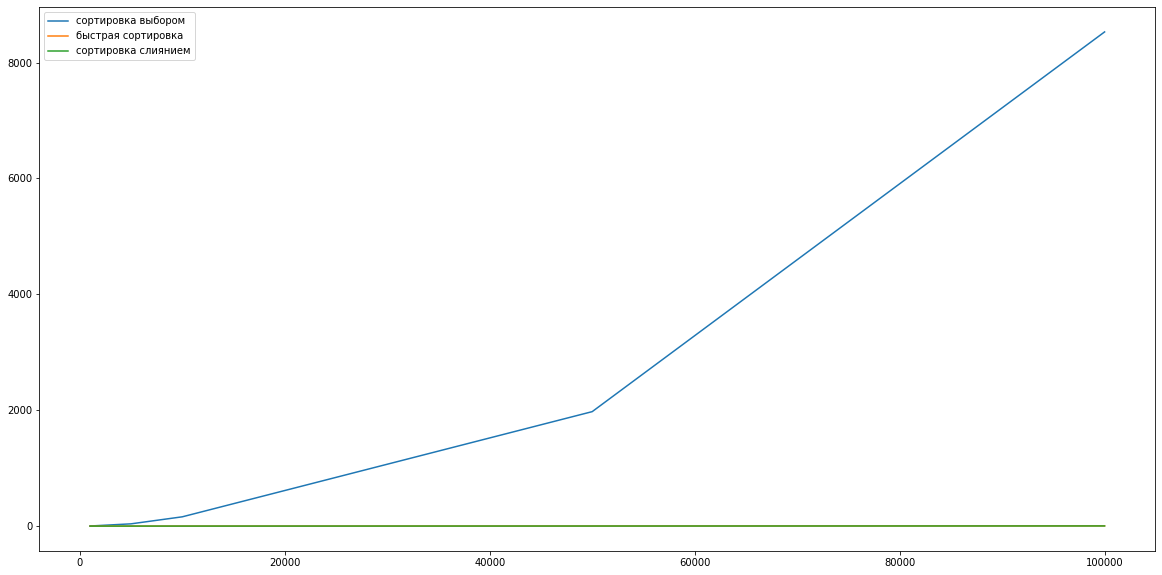

In [18]:
import matplotlib.pyplot as plt

""" Построение графика зависимости времени сортировок выбором, быстрой и слиянием от величины выборки """
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, choices_time, label = 'сортировка выбором')
ax.plot(sizes, quick_time, label = 'быстрая сортировка')
ax.plot(sizes, merge_time, label = 'сортировка слиянием')
ax.legend()
ax.plot()

[]

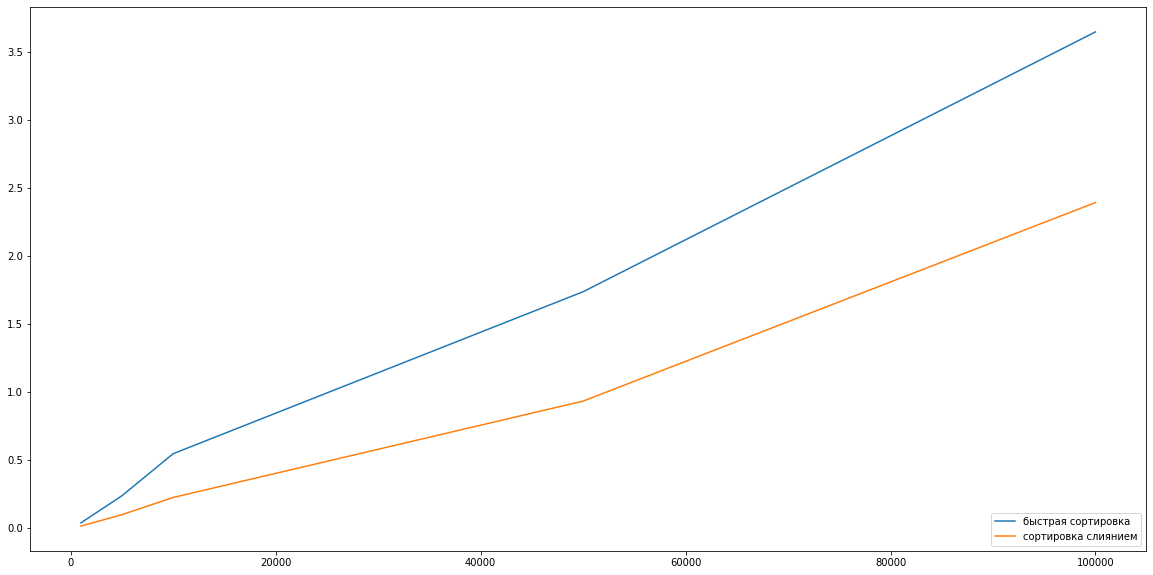

In [19]:
""" Построение графика зависимости времени сортировок быстрой и слиянием от величины выборки """
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sizes, quick_time, label = 'быстрая сортировка')
ax.plot(sizes, merge_time, label = 'сортировка слиянием')
ax.legend(loc='lower right')
ax.plot()